# Use sklearn Random Forest

Kaggle dataset: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

In [196]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [197]:
import polars as pl
from sklearn.preprocessing import LabelEncoder

### Read the test dataset

In [198]:
df = pl.read_csv("../../data/students performance in exams/exams.csv")
df

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,i64,i64,i64
"""male""","""group A""","""high school""","""standard""","""completed""",67,67,63
"""female""","""group D""","""some high school""","""free/reduced""","""none""",40,59,55
"""male""","""group E""","""some college""","""free/reduced""","""none""",59,60,50
"""male""","""group B""","""high school""","""standard""","""none""",77,78,68
"""male""","""group E""","""associate's degree""","""standard""","""completed""",78,73,68
…,…,…,…,…,…,…,…
"""male""","""group C""","""high school""","""standard""","""none""",73,70,65
"""male""","""group D""","""associate's degree""","""free/reduced""","""completed""",85,91,92
"""female""","""group C""","""some high school""","""free/reduced""","""none""",32,35,41


In [199]:
# Create a new DataFrame that shows the null counts per column
df.null_count()

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


In [200]:
# Get a mask of all duplicated rows in this DataFrame and filter so we see just the duplicate records.
df.filter(df.is_duplicated())

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,i64,i64,i64
"""male""","""group E""","""associate's degree""","""standard""","""completed""",100,100,100
"""male""","""group E""","""associate's degree""","""standard""","""completed""",100,100,100


In [201]:
# Drop duplicate rows from this dataframe, returning a new dataframe.
df = df.unique(maintain_order=True)
df

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,i64,i64,i64
"""male""","""group A""","""high school""","""standard""","""completed""",67,67,63
"""female""","""group D""","""some high school""","""free/reduced""","""none""",40,59,55
"""male""","""group E""","""some college""","""free/reduced""","""none""",59,60,50
"""male""","""group B""","""high school""","""standard""","""none""",77,78,68
"""male""","""group E""","""associate's degree""","""standard""","""completed""",78,73,68
…,…,…,…,…,…,…,…
"""male""","""group C""","""high school""","""standard""","""none""",73,70,65
"""male""","""group D""","""associate's degree""","""free/reduced""","""completed""",85,91,92
"""female""","""group C""","""some high school""","""free/reduced""","""none""",32,35,41


In [202]:
# Display summary statistics for the data
df.describe()

statistic,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,str,f64,f64,f64
"""count""","""999""","""999""","""999""","""999""","""999""",999.0,999.0,999.0
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",null,null,null,null,null,66.362362,68.970971,67.705706
"""std""",null,null,null,null,null,15.373794,14.711935,15.575322
"""min""","""female""","""group A""","""associate's degree""","""free/reduced""","""completed""",13.0,27.0,23.0
"""25%""",null,null,null,null,null,56.0,60.0,58.0
"""50%""",null,null,null,null,null,66.0,70.0,68.0
"""75%""",null,null,null,null,null,77.0,79.0,79.0
"""max""","""male""","""group E""","""some high school""","""standard""","""none""",100.0,100.0,100.0


[Text(0.5, 1.0, 'Math Score')]

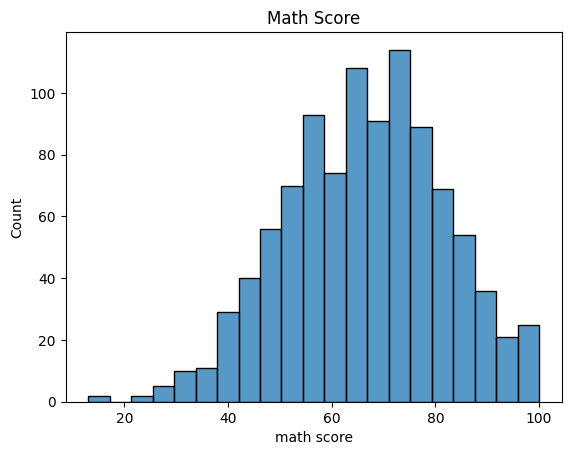

In [203]:
# Display a histogram of math scores
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=(df), x="math score").set(title="Math Score")

[Text(0.5, 1.0, 'Reading Score')]

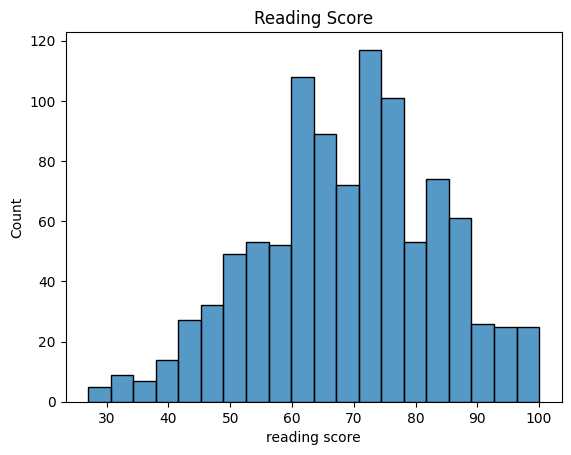

In [204]:
# Display a histogram of reading scores
sns.histplot(data=(df), x="reading score").set(title="Reading Score")

[Text(0.5, 1.0, 'Writing Score')]

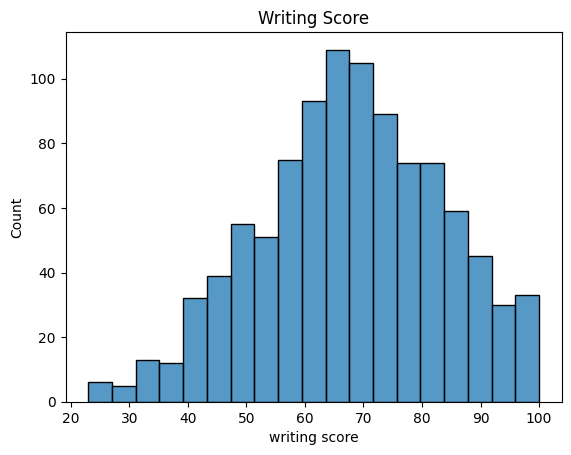

In [205]:
# Display a histogram of writing scores
sns.histplot(data=(df), x="writing score").set(title="Writing Score")

<Axes: ylabel='math score'>

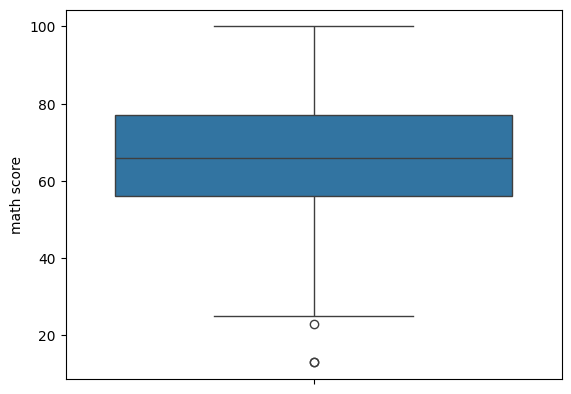

In [206]:
# show a boxplot of math scores
sns.boxplot(
    data=df,
    y="math score",
)

<Axes: ylabel='reading score'>

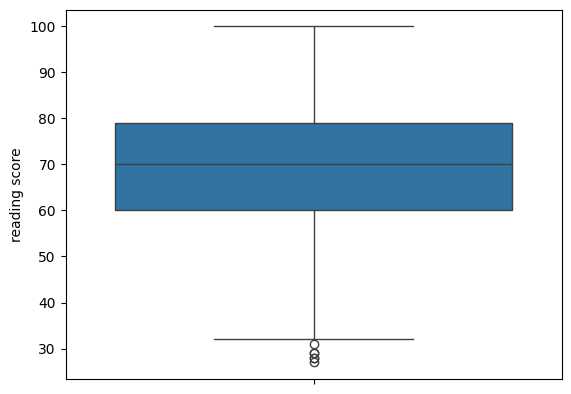

In [207]:
# show a boxplot of reading scores
sns.boxplot(
    data=df,
    y="reading score",
)

<Axes: ylabel='writing score'>

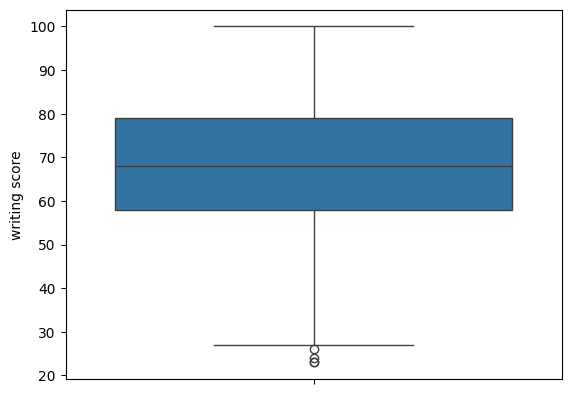

In [208]:
# show a boxplot of writing scores
sns.boxplot(
    data=df,
    y="writing score",
)

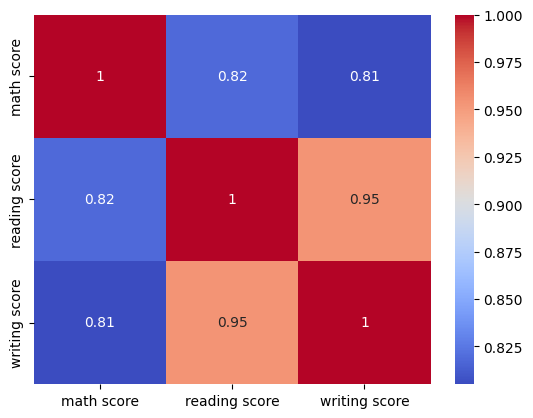

In [209]:
# show a heatmap of the math, reading and writing scores
sns.heatmap(
    df.select(["math score", "reading score", "writing score"]).corr(),
    annot=True,
    cmap="coolwarm",
    xticklabels=["math score", "reading score", "writing score"],
    yticklabels=["math score", "reading score", "writing score"],
);

In [210]:
# inspect the schema
df.schema

Schema([('gender', String),
        ('race/ethnicity', String),
        ('parental level of education', String),
        ('lunch', String),
        ('test preparation course', String),
        ('math score', Int64),
        ('reading score', Int64),
        ('writing score', Int64)])

In [211]:
# encode the string values
labelencoder = LabelEncoder()

# get the names of the string columns
columns_to_encode = [col.name for col in df.iter_columns() if col.dtype == pl.String]

# create new columns to hold the encoded values of the string columns
pl_series = [
    pl.Series(feature + "_num", labelencoder.fit_transform(df[feature]))
    for feature in columns_to_encode
]

# create a new dataframe that contains all the original columns, plus the encoded
df_2 = df.with_columns(pl_series)
df_2

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_num,race/ethnicity_num,parental level of education_num,lunch_num,test preparation course_num
str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64
"""male""","""group A""","""high school""","""standard""","""completed""",67,67,63,1,0,2,1,0
"""female""","""group D""","""some high school""","""free/reduced""","""none""",40,59,55,0,3,5,0,1
"""male""","""group E""","""some college""","""free/reduced""","""none""",59,60,50,1,4,4,0,1
"""male""","""group B""","""high school""","""standard""","""none""",77,78,68,1,1,2,1,1
"""male""","""group E""","""associate's degree""","""standard""","""completed""",78,73,68,1,4,0,1,0
…,…,…,…,…,…,…,…,…,…,…,…,…
"""male""","""group C""","""high school""","""standard""","""none""",73,70,65,1,2,2,1,1
"""male""","""group D""","""associate's degree""","""free/reduced""","""completed""",85,91,92,1,3,0,0,0
"""female""","""group C""","""some high school""","""free/reduced""","""none""",32,35,41,0,2,5,0,1


In [212]:
# select just the integer columns

df_2 = df_2.select([col.name for col in df_2.iter_columns() if col.dtype == pl.Int64])
df_2

math score,reading score,writing score,gender_num,race/ethnicity_num,parental level of education_num,lunch_num,test preparation course_num
i64,i64,i64,i64,i64,i64,i64,i64
67,67,63,1,0,2,1,0
40,59,55,0,3,5,0,1
59,60,50,1,4,4,0,1
77,78,68,1,1,2,1,1
78,73,68,1,4,0,1,0
…,…,…,…,…,…,…,…
73,70,65,1,2,2,1,1
85,91,92,1,3,0,0,0
32,35,41,0,2,5,0,1


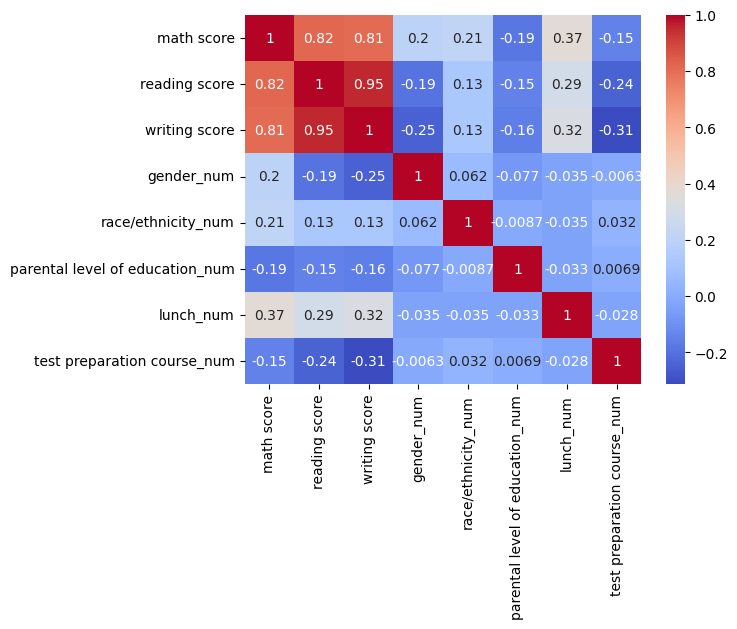

In [213]:
# show a heatmap of all data
columns_names = [col.name for col in df_2.iter_columns()]

sns.heatmap(
    df_2.corr(),
    annot=True,
    cmap="coolwarm",
    xticklabels=columns_names,
    yticklabels=columns_names,
);

In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# split data into train and test sets
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["math score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  172.57363025054835
R2 score:  0.2750316187631736


([<matplotlib.axis.XTick at 0x281f250a8a0>,
 [Text(0, 0, 'gender_num'),
  Text(1, 0, 'race/ethnicity_num'),
  Text(2, 0, 'parental level of education_num'),
  Text(3, 0, 'lunch_num'),
  Text(4, 0, 'test preparation course_num')])

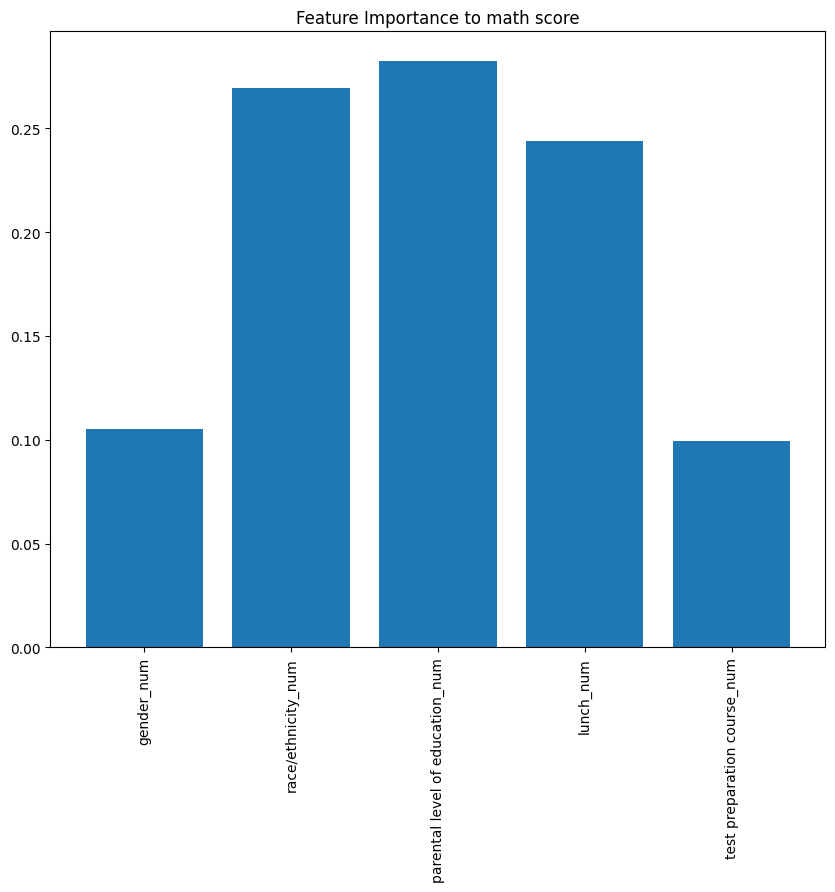

In [215]:
# plot feature importance
columns_names = [col.name for col in X.iter_columns()]
importances = rf_math_score.feature_importances_
indices = [0, 1, 2, 3, 4]
plt.figure(figsize=(10, 8))
plt.title("Feature Importance to math score")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), columns_names, rotation=90)

In [216]:
# train model on with other class
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["reading score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the reading score
rf_reading_score = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reading_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_reading_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  181.80634911677762
R2 score:  0.17408615862726085


([<matplotlib.axis.XTick at 0x281f263f200>,
 [Text(0, 0, 'gender_num'),
  Text(1, 0, 'race/ethnicity_num'),
  Text(2, 0, 'parental level of education_num'),
  Text(3, 0, 'lunch_num'),
  Text(4, 0, 'test preparation course_num')])

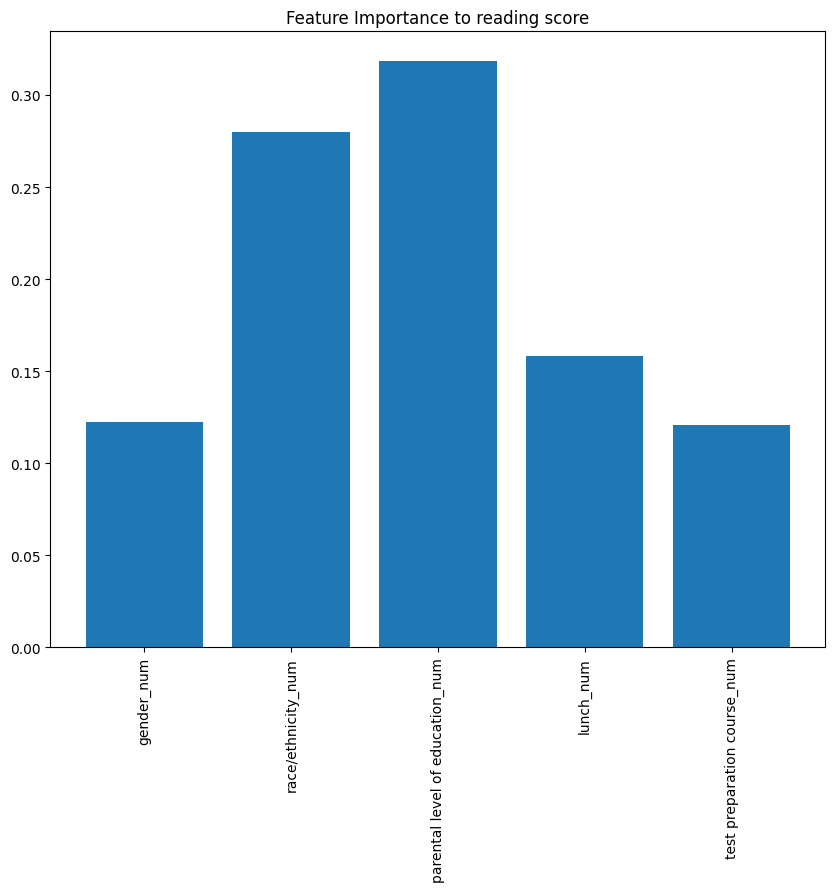

In [217]:
# plot feature importance
columns_names = [col.name for col in X.iter_columns()]
importances = rf_reading_score.feature_importances_
indices = [0, 1, 2, 3, 4]
plt.figure(figsize=(10, 8))
plt.title("Feature Importance to reading score")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), columns_names, rotation=90)

In [218]:
# train model on with other class
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["writing score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the writing score
rf_writing_score = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_writing_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_writing_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  165.09060195702858
R2 score:  0.32528995043897535


([<matplotlib.axis.XTick at 0x281f2f83aa0>,
 [Text(0, 0, 'gender_num'),
  Text(1, 0, 'race/ethnicity_num'),
  Text(2, 0, 'parental level of education_num'),
  Text(3, 0, 'lunch_num'),
  Text(4, 0, 'test preparation course_num')])

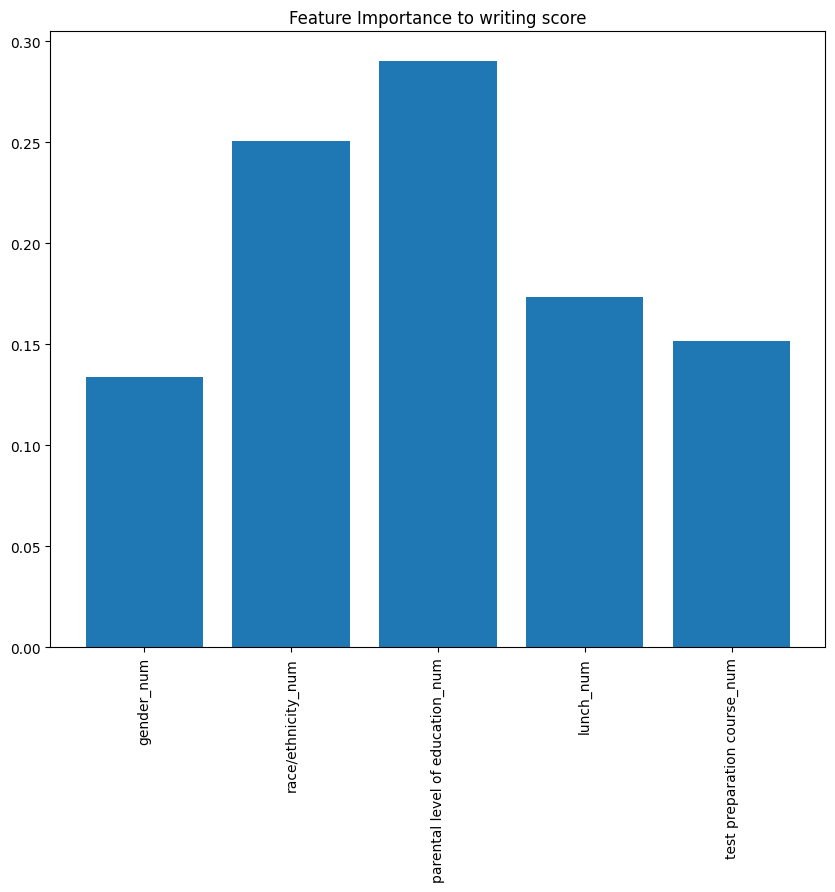

In [219]:
# plot feature importance
columns_names = [col.name for col in X.iter_columns()]
importances = rf_writing_score.feature_importances_
indices = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 8))
plt.title("Feature Importance to writing score")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), columns_names, rotation=90)